<a href="https://colab.research.google.com/github/Ismat-Samadov/colab_notebooks/blob/main/vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install opencv-python numpy matplotlib

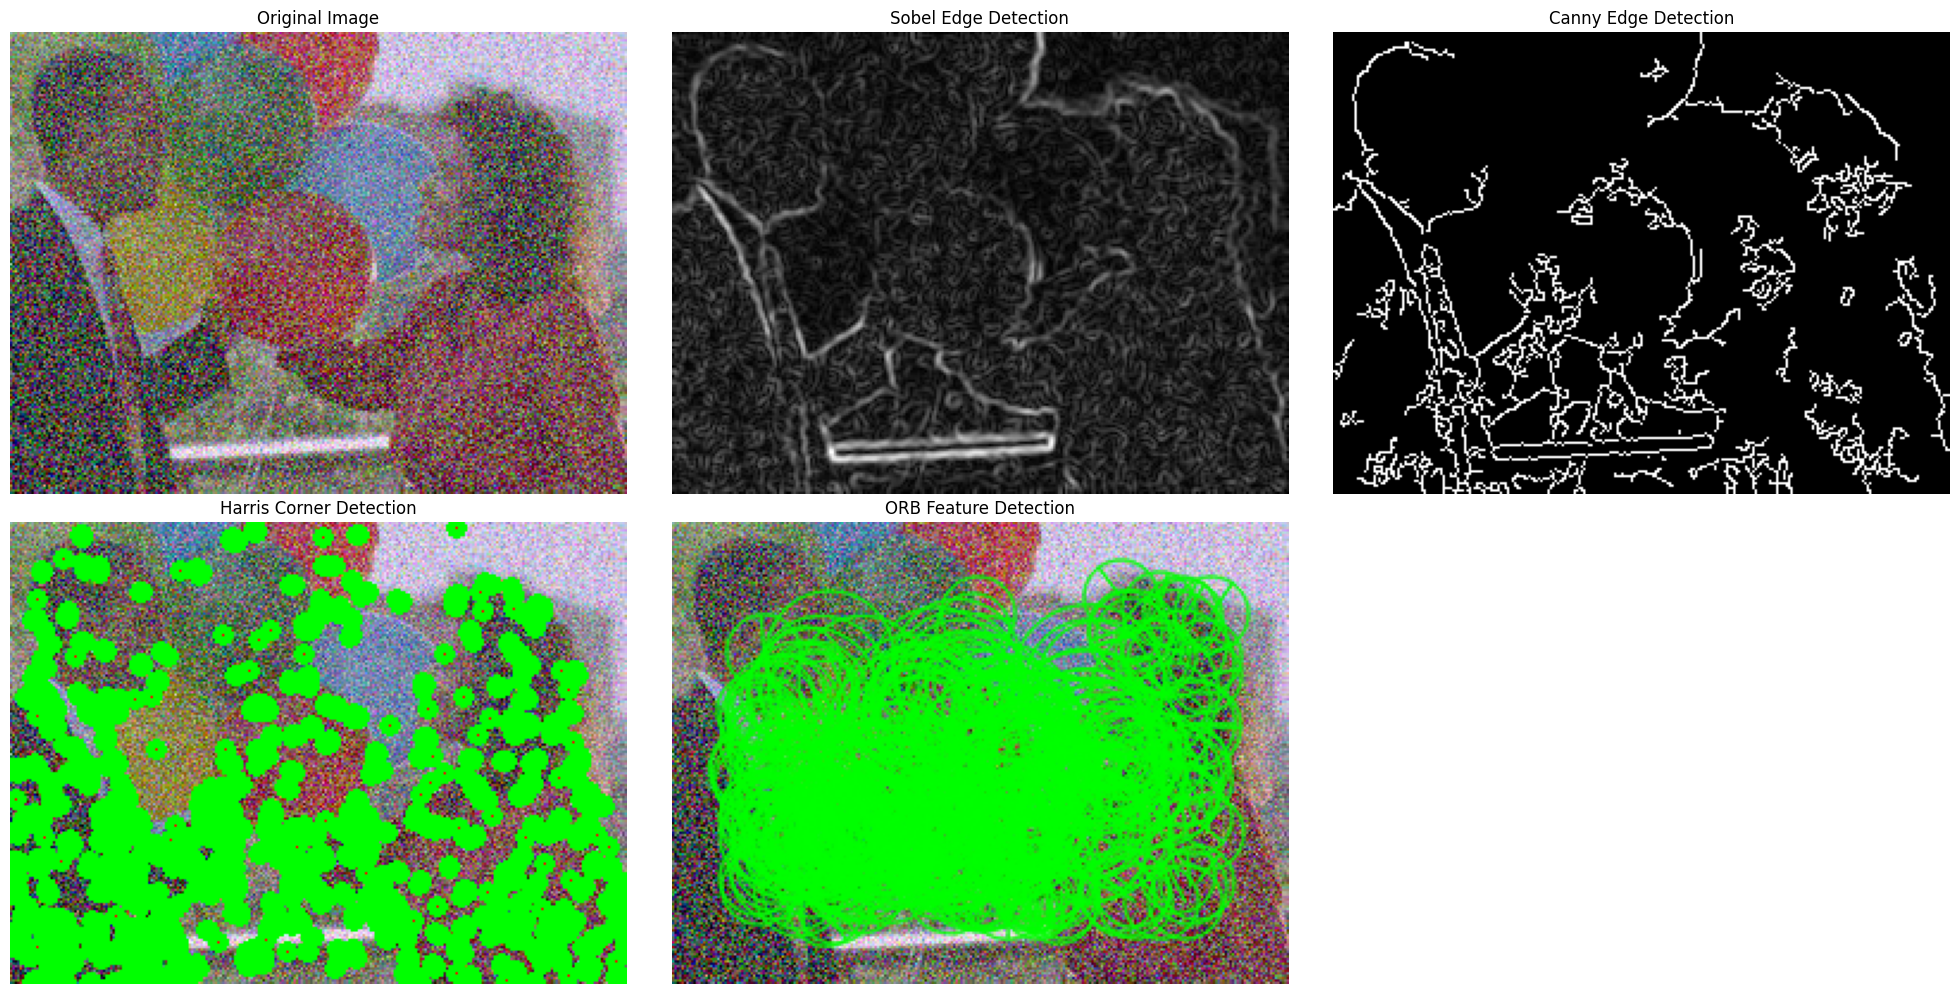

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('noise.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to re duce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 1. Sobel Edge Detection
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude
sobel_magnitude = cv2.magnitude(sobelx, sobely)
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 2. Canny Edge Detection
canny_edges = cv2.Canny(blurred, 50, 150)

# 3. Harris Corner Detection
# First, convert to float32 for better precision
gray_float = np.float32(blurred)
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate results to enhance corner points
dst = cv2.dilate(harris_corners, None)

# Create a copy of original image to draw corners on
harris_display = image.copy()

# Threshold for corners and mark them with circles
# Using a relative threshold based on the maximum value
threshold = 0.01 * dst.max()
harris_display[dst > threshold] = [0, 0, 255]  # Mark with red

# For better visualization with circles instead of just coloring pixels
y_coords, x_coords = np.where(dst > threshold)
for y, x in zip(y_coords, x_coords):
    cv2.circle(harris_display, (x, y), 3, (0, 255, 0), 1)  # Green circle around red points

# 4. ORB Feature Detection
orb = cv2.ORB_create(nfeatures=500)
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints
orb_display = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0),
                               flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Display results
plt.figure(figsize=(20, 10))

plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(232), plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Detection'), plt.axis('off')

plt.subplot(233), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.axis('off')

plt.subplot(234), plt.imshow(cv2.cvtColor(harris_display, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection'), plt.axis('off')

plt.subplot(235), plt.imshow(cv2.cvtColor(orb_display, cv2.COLOR_BGR2RGB))
plt.title('ORB Feature Detection'), plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Save results
cv2.imwrite('sobel_result.jpg', sobel_magnitude)
cv2.imwrite('canny_result.jpg', canny_edges)
cv2.imwrite('harris_result.jpg', harris_display)
cv2.imwrite('orb_result.jpg', orb_display)